## Import Libraries

In [1]:
import importlib
import os
from sklearn.model_selection import train_test_split
import pandas as pd 

try:
    importlib.reload(dataloader)
    importlib.reload(model)
    importlib.reload(analysis)
except:
    import dataloader
    import model
    import analysis

## Load Data

In [2]:
data = pd.read_csv(os.path.abspath("all_tested_molecules.csv"))

In [3]:
descriptors = dataloader.get_molecular_descriptors(data, remove_fingerprints=False)
descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0


In [4]:
labels = dataloader.get_labels(data)
labels.head()

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1


## PCA Analysis

In [5]:
descriptors = analysis.ScaleDescriptors(descriptors)

In [6]:
highly_correlated_pairs = analysis.correlation(descriptors)

In [7]:
descriptors = analysis.remove_colinear(descriptors, highly_correlated_pairs)

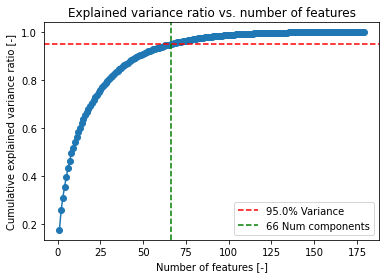

In [8]:
num_components = analysis.plot_variance(descriptors, percentage=0.95)

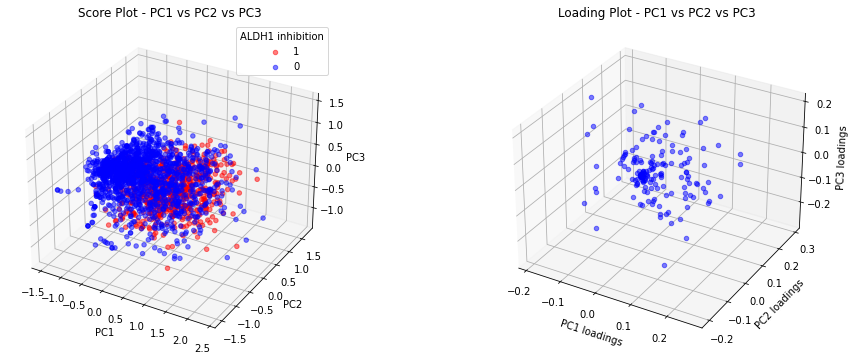

In [9]:
analysis.plot_loadings(descriptors, labels, num_components)

In [10]:
feature_rankings = analysis.feature_rankings(descriptors, num_components)
feature_rankings

fr_para_hydroxylation    0.097114
PEOE_VSA8                0.093548
fr_Ar_NH                 0.093111
EState_VSA6              0.092930
SlogP_VSA3               0.091865
                           ...   
fr_HOCCN                 0.000000
fr_isothiocyan           0.000000
fr_isocyan               0.000000
fr_diazo                 0.000000
fr_benzodiazepine        0.000000
Length: 179, dtype: float64

## PCA Selected Descriptors

In [26]:
selected_descriptors = list(feature_rankings[feature_rankings>0.07].index)
selected_descriptors

['fr_para_hydroxylation',
 'PEOE_VSA8',
 'fr_Ar_NH',
 'EState_VSA6',
 'SlogP_VSA3',
 'MaxAbsEStateIndex',
 'qed',
 'fr_imidazole',
 'fr_aryl_methyl',
 'fr_pyridine',
 'fr_hdrzine',
 'fr_furan',
 'EState_VSA5',
 'PEOE_VSA13',
 'PEOE_VSA9',
 'fr_piperzine',
 'fr_sulfide',
 'PEOE_VSA12',
 'EState_VSA7',
 'BCUT2D_MRLOW',
 'EState_VSA4',
 'EState_VSA8',
 'SMR_VSA9',
 'PEOE_VSA10',
 'fr_thiophene',
 'EState_VSA3',
 'fr_hdrzone',
 'PEOE_VSA6',
 'fr_Ndealkylation2',
 'PEOE_VSA3',
 'fr_piperdine',
 'fr_sulfonamd',
 'PEOE_VSA5',
 'fr_bicyclic',
 'fr_NH1',
 'fr_methoxy',
 'SlogP_VSA8',
 'PEOE_VSA11',
 'PEOE_VSA14',
 'fr_thiazole',
 'MaxPartialCharge',
 'NumAliphaticHeterocycles',
 'SlogP_VSA1',
 'PEOE_VSA2',
 'FpDensityMorgan3',
 'FpDensityMorgan1']

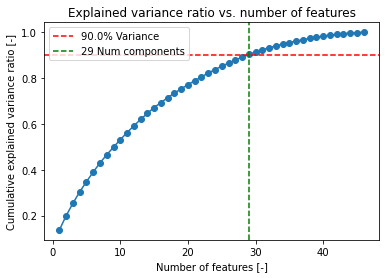

In [12]:
num_components_selected = analysis.plot_variance(descriptors[selected_descriptors], percentage=0.9)

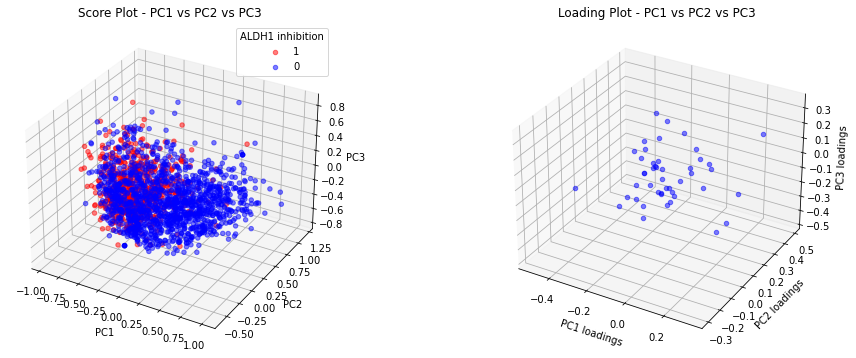

In [13]:
analysis.plot_loadings(descriptors[selected_descriptors], labels, num_components_selected)

## PCA Literature

In [23]:
literature_descriptors = descriptors.columns[:5].tolist()+descriptors.columns[19:20].tolist()+ descriptors.columns[28:42].tolist()+ descriptors.columns[52:64].tolist()+ descriptors.columns[93:96].tolist()+ descriptors.columns[101:102].tolist()
literature_descriptors


['MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'MolWt',
 'AvgIpc',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA7',
 'SlogP_VSA8',
 'SlogP_VSA9',
 'TPSA',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'MolLogP']

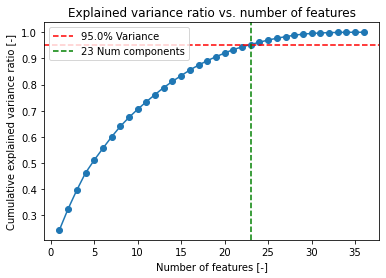

In [27]:
num_components_literature = analysis.plot_variance(descriptors[literature_descriptors], percentage=0.95)

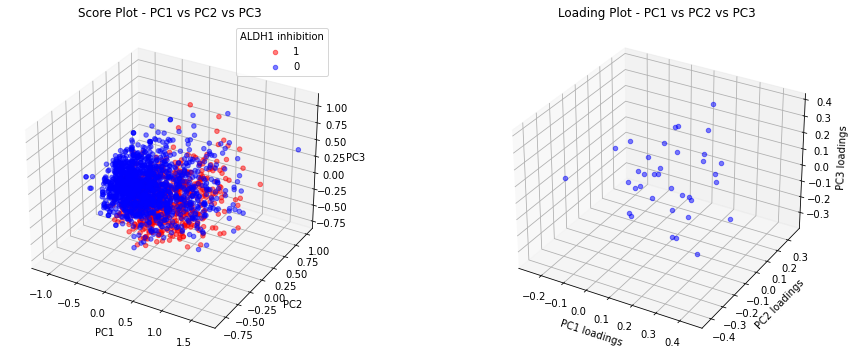

In [25]:
analysis.plot_loadings(descriptors[literature_descriptors], labels, num_components_selected)

## Model training

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(descriptors[selected_descriptors], labels, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(descriptors[literature_descriptors], labels, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(descriptors, labels, test_size=0.2, random_state=0)

In [29]:
#pipeline = model.train(X_train, y_train, num_components_selected, degrees=[1,2], use_pca=[True, False])
pipeline = model.train(X_train, y_train, num_components_literature, degrees=[1,2], use_pca=[True, False])
#pipeline = model.train(X_train, y_train, num_components, degrees=[1,2], use_pca=[True, False])

Degree: 1, Use_PCA: True
Cross-validation scores: [0.7      0.728125 0.721875 0.73125  0.70625 ]
Average score: 0.7175
Degree: 2, Use_PCA: True
Cross-validation scores: [0.709375 0.7375   0.71875  0.73125  0.703125]
Average score: 0.72
Degree: 1, Use_PCA: False
Cross-validation scores: [0.7125   0.75     0.75     0.740625 0.7375  ]
Average score: 0.7381249999999999
Degree: 2, Use_PCA: False
Cross-validation scores: [0.71875  0.7625   0.753125 0.734375 0.74375 ]
Average score: 0.7424999999999999


Test accuracy = 0.745

Test confusion_matrix


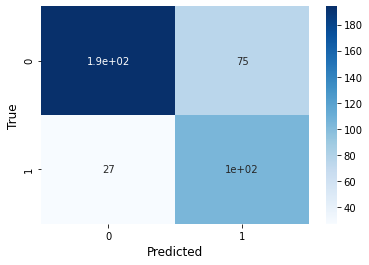

In [30]:
accuracy = model.test(pipeline, X_test, y_test)

## Predict new molecules

In [ ]:
new_data = pd.read_csv(os.path.abspath("untested_molecules.csv"))

In [ ]:
new_descriptors = dataloader.get_molecular_descriptors(new_data, remove_fingerprints=False)
new_descriptors.head()

In [ ]:
new_descriptors = analysis.remove_colinear(new_descriptors, highly_correlated_pairs)

In [ ]:
new_labels = dataloader.get_labels(new_data)
new_labels.head()

In [ ]:
#new_labels = model.predict(pipeline, new_descriptors[selected_descriptors], new_labels)
new_labels = model.predict(pipeline, new_descriptors[literature_descriptors], new_labels)
#new_labels = model.predict(pipeline, new_descriptors, new_labels)

In [ ]:
new_labels.head(100)

In [ ]:
new_labels.head(100).to_csv("predicted_molecules.csv", index=False)